<a href="https://colab.research.google.com/github/Mishabz4321/Time-Series-Forecasting-and-Analytics/blob/main/Stock_market_using_ARIMA_and_LSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels as sm
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.graphics.tsaplots as sgt
from scipy.stats.distributions import chi2
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/013 IndexE8.csv')
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [ ]:
df.shape

(6269, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [ ]:
df['date']= pd.to_datetime(df['date'])

In [ ]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [ ]:
df_copy= df.copy()

In [ ]:
df_copy= df_copy.set_index('date')
df_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-07-01,469.90,2224.95,3445.98,18124.01
1994-10-01,475.27,2225.00,3440.58,18443.44
1994-11-01,474.13,2228.10,3413.77,18485.25
1994-12-01,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


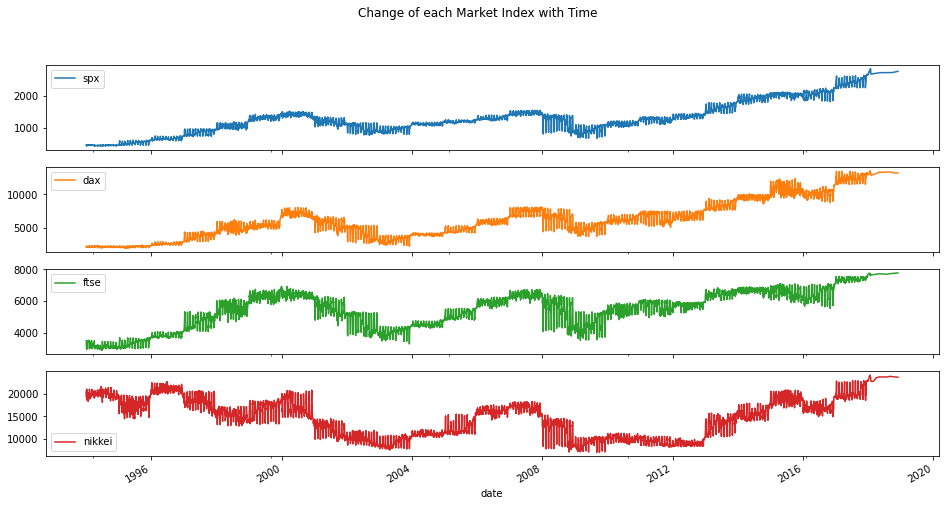

In [ ]:
df_copy.plot(subplots=True, title='Change of each Market Index with Time', figsize=(16,8));

### Here we are going to use spx500

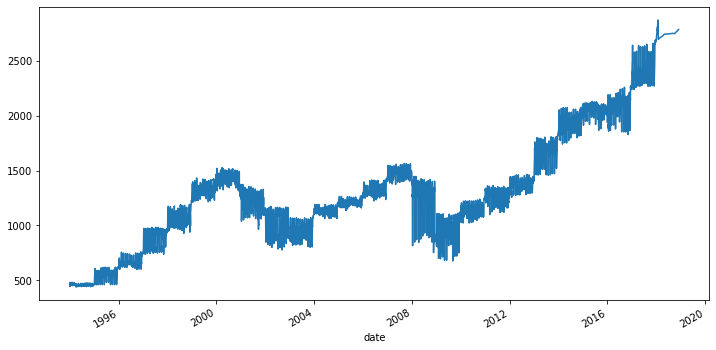

In [ ]:
df_copy['spx'].plot(figsize=(12,6))

In [ ]:
# setting 'day' frequency and
df_copy= df_copy.asfreq('B')
df_copy= df_copy.fillna(method='ffill')

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6152 entries, 1994-07-01 to 2018-01-29
Freq: B
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   spx     6152 non-null   float64
 1   dax     6152 non-null   float64
 2   ftse    6152 non-null   float64
 3   nikkei  6152 non-null   float64
dtypes: float64(4)
memory usage: 240.3 KB


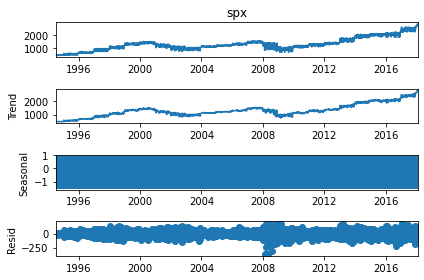

In [ ]:
# computing addictive decomposition
s_add= seasonal_decompose(df_copy['spx'])
s_add.plot();

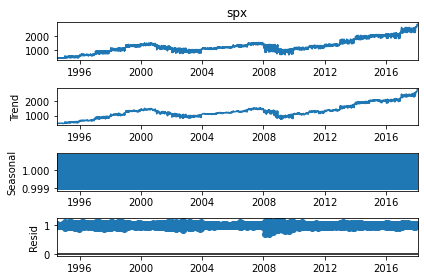

In [ ]:
# computing multiplicative decomposition
s_add= seasonal_decompose(df_copy['spx'], model='multiplicative')
s_add.plot();

### Both seems same

In [ ]:
# Checking Stationarity of Data
# ADFULLER TEST
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_copy['spx'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: 1.5278847192226328
p-value: 0.9976242548159865
Critial Values: {'1%': -3.431417565493639, '5%': -2.862011767622901, '10%': -2.567021119188598}
Series is not Stationary


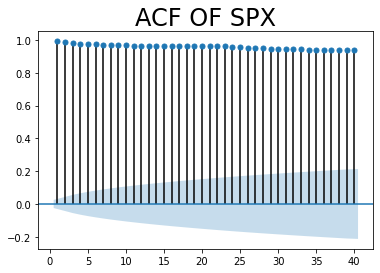

In [ ]:
# plotting ACF
sgt.plot_acf(df_copy['spx'], lags=40, zero= False)
plt.title('ACF OF SPX', size=24);

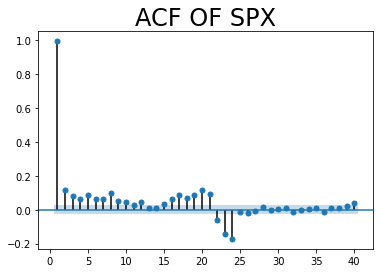

In [ ]:
# plotting PACF
sgt.plot_pacf(df_copy['spx'], lags=40, zero= False)
plt.title('ACF OF SPX', size=24);

In [ ]:
# Splitting into train and test
size= int(len(df_copy)*0.8)
train= df_copy.iloc[:size]
test= df_copy.iloc[size:]

In [ ]:
print(train.shape, test.shape)

(4921, 4) (1231, 4)


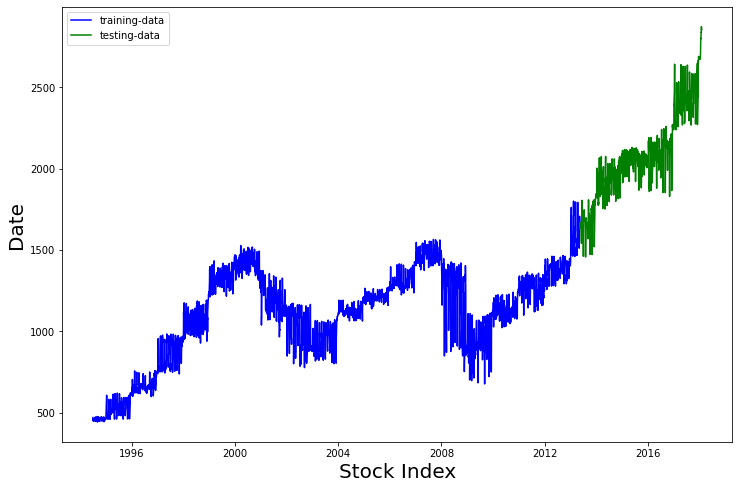

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(train['spx'], 'blue', label='training-data')
plt.plot(test['spx'], 'green', label='testing-data')
plt.xlabel('Stock Index', size=20)
plt.ylabel('Date', size=20)
plt.legend()

In [ ]:
pip install pmdarima

In [ ]:
# Using Auto Arima model to get p, d and q values automatically
from pmdarima import auto_arima

In [ ]:
model_autoarima= auto_arima(train['spx'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=8, max_q=8, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoarima.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=52624.768, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=52536.956, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=52514.871, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=52622.879, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=52030.022, Time=2.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=52029.582, Time=3.68 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=52496.813, Time=0.53 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=52016.779, Time=5.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=52455.316, Time=0.65 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=52006.458, Time=7.34 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=52393.020, Time=0.88 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=52006.160, Time=10.40 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=52362.023, Time=1.05 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=51997.380, Time=12.04 sec
 ARIMA(6,1,0)(0,0

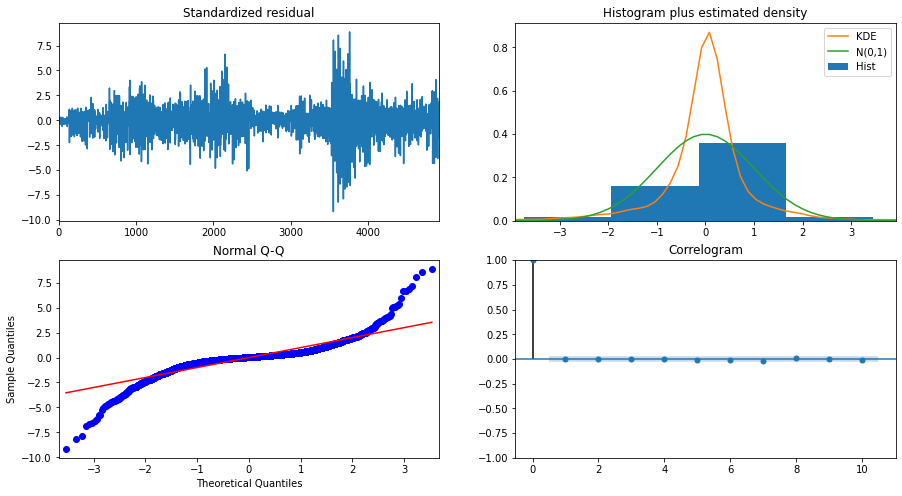

In [ ]:
model_autoarima.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
%time
# Builing ARIMA Model
#train_ar= train['spx'].values
#test_ar= test['spx'].values
#history = [x for x in train_ar]
#predictions = []
#for t in range(len(test)):
    #model = ARIMA(history, order=(2,1,5))
    #model_fit = model.fit(disp=0)
    #output = model_fit.forecast()
    #yhat = output[0]
    #predictions.append(yhat)
    #obs = test_ar[t]
    #history.append(obs)

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 8.58 µs


In [ ]:
#plt.figure(figsize=(12,7))
#plt.plot(train['spx'], color='blue', label='Training Data')
#plt.plot(test.index, predictions, color='green', marker='o', linestyle='dashed', label='Predicted Price')
#plt.plot(test.index, test['spx'], color='red', label='Actual stock index')
#plt.title('Stock index Prediction')
#plt.xlabel('Dates')
#plt.ylabel('Stock index')
#plt.legend()

In [ ]:
# Building arima model with p, d and q predicted by auto-arima model
model_arima = ARIMA(train['spx'] ,order=(2,1,5))  
fitted = model_arima.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.spx   No. Observations:                 4920
Model:                 ARIMA(2, 1, 5)   Log Likelihood              -25928.971
Method:                       css-mle   S.D. of innovations             47.040
Date:                Fri, 30 Jul 2021   AIC                          51875.943
Time:                        05:17:13   BIC                          51934.452
Sample:                    07-04-1994   HQIC                         51896.466
                         - 05-10-2013                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2352      0.128      1.841      0.066      -0.015       0.486
ar.L1.D.spx     1.8957      0.008    241.537      0.000       1.880       1.911
ar.L2.D.spx    -0.9694      0.009   -113.629    

In [ ]:
test.shape

(1231, 4)

In [ ]:
fc, se, conf= fitted.forecast(1231, alpha=0.05)

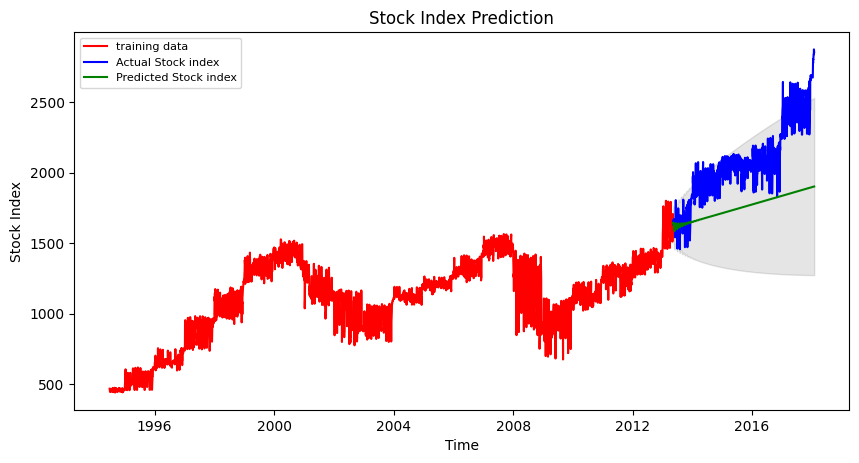

In [ ]:
# Make as pandas series
forecast_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train['spx'],'red',label='training data')
plt.plot(test['spx'], color = 'blue', label='Actual Stock index')
plt.plot(forecast_series, color = 'green',label='Predicted Stock index')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Stock Index Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Index')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
arima_exog= ARIMA(train.spx, exog=train.dax, order=(2,1,5))

In [ ]:
arima_exog_fit= arima_exog.fit(disp=-1)

In [ ]:
arima_exog_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.spx   No. Observations:                 4920
Model:                 ARIMA(2, 1, 5)   Log Likelihood              -25929.076
Method:                       css-mle   S.D. of innovations             47.041
Date:                Fri, 30 Jul 2021   AIC                          51878.151
Time:                        05:26:18   BIC                          51943.162
Sample:                    07-04-1994   HQIC                         51900.955
                         - 05-10-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0565      0.424      0.133      0.894      -0.774       0.887
dax          3.173e-05   7.95e-05      0.399      0.690      -0.000       0.000
ar.L1.D.spx     1.8956      0.008    240.077      0.000       1.880       1.911
ar.L2.D.spx    -0.9693      0.009   -112.853      0.000      -0.986      -0.952
ma.L1.D.spx    -2.2018      0.017   -126.888      0.000      -2.236      -2.168
ma.L2.D.spx     1.3368      0.038     34.983      0.000       1.262       1.412
ma.L3.D.spx    -0.0815      0.044     -1.856      0.063      -0.168       0.005
ma.L4.D.spx     0.1213      0.036      3.414      0.001       0.052       0.191
ma.L5.D.spx    -0.1607      0.016    -10.162      0.000      -0.192      -0.130
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9778           -0.2749j            1.0157           -0.0436
AR.2            0.9778           +0.2749j            1.0157            0.0436
MA.1            1.0208           -0.2587j            1.0531           -0.0395
MA.2            1.0208           +0.2587j            1.0531            0.0395
MA.3            1.1568           -0.0000j            1.1568           -0.0000
MA.4           -1.2217           -1.8329j            2.2027           -0.3436
MA.5           -1.2217           +1.8329j            2.2027            0.3436
-----------------------------------------------------------------------------
"""

In [ ]:
fc

array([1645.69321746, 1646.95218238, 1642.05791495, ..., 1901.20047848,
       1901.4356767 , 1901.67087493])

In [ ]:
fc, se, conf= arima_exog_fit.forecast(1231, alpha=0.05, exog=test.dax)

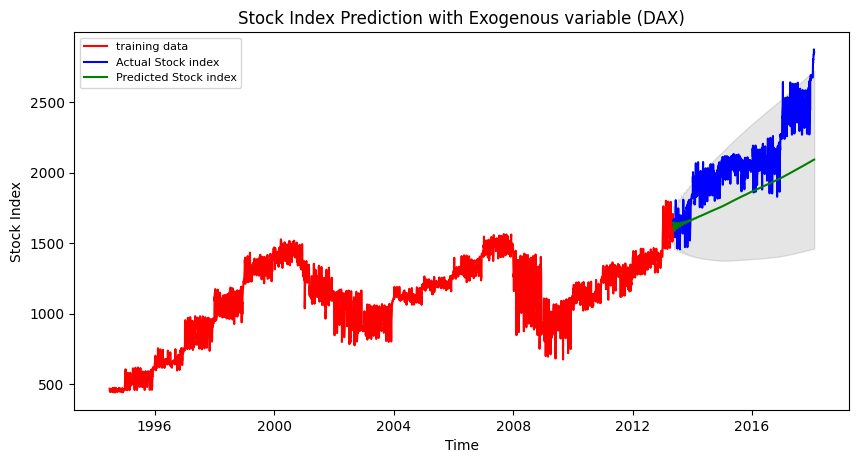

In [ ]:
# Make as pandas series
forecast_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train['spx'],'red',label='training data')
plt.plot(test['spx'], color = 'blue', label='Actual Stock index')
plt.plot(forecast_series, color = 'green',label='Predicted Stock index')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Stock Index Prediction with Exogenous variable (DAX)')
plt.xlabel('Time')
plt.ylabel('Stock Index')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
fc

array([1646.10069375, 1647.62903279, 1642.93243154, ..., 2091.48778035,
       2091.96750673, 2092.44673532])

## RNN-LSTM APPROACH

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Choosing SPX for Forecasting
data_train= train['spx']

In [ ]:
# Normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
data_scaled= scaler.fit_transform(data_train.values.reshape(-1,1))

In [ ]:
data_scaled.shape

(5015, 1)

In [ ]:
# how many days do i want to base my predictions on ?
prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(data_scaled)):
    x_train.append(data_scaled[x - prediction_days:x, 0])
    y_train.append(data_scaled[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
print(x_train.shape, y_train.shape)

(4955, 60, 1) (4955,)


In [ ]:
def LSTM_model():
  model= Sequential()
  model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
  model.add(Dropout(0.2))
  model.add(LSTM(units=50, activation='relu', return_sequences=True))
  model.add(Dropout(0.2))
  model.add(LSTM(units=50))
  model.add(Dropout(0.2))
  model.add(Dense(units=1))

  return model


In [ ]:
model = LSTM_model()
model.summary()
# Train the ANN
es_callback =EarlyStopping(monitor='loss', patience=2, 
                                               restore_best_weights=True,
                                               verbose=1)
model.compile(optimizer='adam', 
              loss='mean_squared_error')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_12 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_14 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [ ]:
model.fit(x_train, y_train, epochs = 30, batch_size = 32, callbacks=[es_callback])

Epoch 1/30
155/155 [==============================] - 45s 266ms/step - loss: 0.0275
Epoch 2/30
155/155 [==============================] - 41s 262ms/step - loss: 0.0044
Epoch 3/30
155/155 [==============================] - 41s 266ms/step - loss: 0.0040
Epoch 4/30
155/155 [==============================] - 41s 266ms/step - loss: 0.0039
Epoch 5/30
155/155 [==============================] - 42s 269ms/step - loss: 0.0034
Epoch 6/30
155/155 [==============================] - 41s 263ms/step - loss: 0.0032
Epoch 7/30
155/155 [==============================] - 40s 261ms/step - loss: 0.0031
Epoch 8/30
155/155 [==============================] - 40s 257ms/step - loss: 0.0028
Epoch 9/30
155/155 [==============================] - 40s 259ms/step - loss: 0.0028
Epoch 10/30
155/155 [==============================] - 40s 257ms/step - loss: 0.0026
Epoch 11/30
155/155 [==============================] - 41s 265ms/step - loss: 0.0025
Epoch 12/30
155/155 [==============================] - 41s 262ms/step - lo

In [ ]:
data_test= test['spx']
total_dataset= pd.concat((data_train, data_test), axis=0)

In [ ]:
total_dataset.shape

(6269,)

In [ ]:
data_train.shape

(5015,)

In [ ]:
data_test.shape

(1254,)

In [ ]:
# Inorder to make prediction of first period of test data, we need last 60 period of train data
model_inputs = total_dataset[len(total_dataset) - len(data_test) - prediction_days:].values
model_inputs.shape

(1314,)

In [ ]:
model_inputs= model_inputs.reshape(-1,1)

In [ ]:
model_inputs.shape

(1314, 1)

In [ ]:
model_inputs = scaler.transform(model_inputs)

predictions= 

In [ ]:
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] ,1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

In [ ]:
predicted_prices

array([[1486.2025],
       [1486.0093],
       [1484.9745],
       ...,
       [2154.5422],
       [2156.2183],
       [2160.89  ]], dtype=float32)

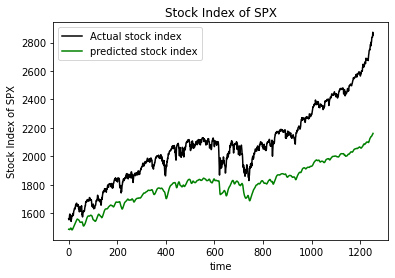

In [ ]:
plt.plot(data_test.values, color='black', label="Actual stock index")
plt.plot(predicted_prices, color= 'green', label="predicted stock index")

plt.title("Stock Index of SPX")
plt.xlabel("time")
plt.ylabel("Stock Index of SPX")
plt.legend()
plt.show()

## Predicting for Day

In [ ]:
# predicting next day
real_data = [model_inputs[len(model_inputs)+1 - prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [ ]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"prediction: {prediction}")

prediction: [[2162.2178]]


## Predicting for Next 10 Days

In [ ]:
## demonstrate prediction for next 10 days
x_input= model_inputs[1255:].reshape(59,)
temp_input=list(x_input)

In [ ]:
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>59):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, 59, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, 59, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1

print(lst_output)

[1.5232465]
1 day input [1.90523627 1.89661463 1.89456286 1.89681223 1.89153261 1.87893568
 1.89751789 1.89151714 1.8944228  1.90934999 1.9076246  1.9076246
 1.91235133 1.91146669 1.93411268 1.93324836 1.95226464 1.94752319
 1.94506704 1.93634617 1.93607752 1.94289212 1.95573053 1.96323377
 1.96687202 1.96575781 1.9561826  1.9772158  1.9899002  1.98222375
 1.98025656 1.98495994 1.98387105 1.98387105 1.98136711 1.98323697
 1.98758398 1.97527344 1.99489566 2.01014426 2.01980684 2.03673837
 2.04077119 2.04393119 2.04122663 2.05831502 2.07483183 2.07483183
 2.06614816 2.08924973 2.08524974 2.09609751 2.11613708 2.12157869
 2.12017649 2.12168711 2.1513997  2.13430532 1.52324653]
1 day output [[1.4586248]]
2 day input [1.89661463 1.89456286 1.89681223 1.89153261 1.87893568 1.89751789
 1.89151714 1.8944228  1.90934999 1.9076246  1.9076246  1.91235133
 1.91146669 1.93411268 1.93324836 1.95226464 1.94752319 1.94506704
 1.93634617 1.93607752 1.94289212 1.95573053 1.96323377 1.96687202
 1.9657578

In [ ]:
prediction_next_10_days= scaler.inverse_transform(np.array(np.array(lst_output).reshape(10,1)))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates= [data_test.index[-1] + DateOffset(days=x) for x in range(0,15)]

In [ ]:
future_dates

[Timestamp('2018-01-29 00:00:00'),
 Timestamp('2018-01-30 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-02-01 00:00:00'),
 Timestamp('2018-02-02 00:00:00'),
 Timestamp('2018-02-03 00:00:00'),
 Timestamp('2018-02-04 00:00:00'),
 Timestamp('2018-02-05 00:00:00'),
 Timestamp('2018-02-06 00:00:00'),
 Timestamp('2018-02-07 00:00:00'),
 Timestamp('2018-02-08 00:00:00'),
 Timestamp('2018-02-09 00:00:00'),
 Timestamp('2018-02-10 00:00:00'),
 Timestamp('2018-02-11 00:00:00'),
 Timestamp('2018-02-12 00:00:00')]

In [ ]:
data_test= pd.DataFrame(data_test)
data_test['prediction']= predicted_prices

In [ ]:
future_data= pd.DataFrame(index=future_dates[1:],columns=pd.DataFrame(data_test).columns)

In [ ]:
future_data= future_data.asfreq('B')

In [ ]:
future_data

,spx,prediction
2018-01-30,NaN,NaN
2018-01-31,NaN,NaN
2018-02-01,NaN,NaN
2018-02-02,NaN,NaN
2018-02-05,NaN,NaN
2018-02-06,NaN,NaN
2018-02-07,NaN,NaN
2018-02-08,NaN,NaN
2018-02-09,NaN,NaN
2018-02-12,NaN,NaN


In [ ]:
future_data['prediction']=prediction_next_10_days

In [ ]:
data_concat= pd.concat([pd.DataFrame(data_test), future_data])

In [ ]:
data_concat

,spx,prediction
2013-04-04,1559.979316,1486.202515
2013-05-04,1553.278930,1486.009277
2013-08-04,1563.071269,1484.974487
2013-09-04,1568.607909,1484.122437
2013-10-04,1587.731827,1483.998779
...,...,...
2018-02-06,NaN,1759.456543
2018-02-07,NaN,1689.771240
2018-02-08,NaN,1628.850586
2018-02-09,NaN,1576.969849


In [ ]:
data_next_10days= pd.DataFrame(prediction_next_10_days)

In [ ]:
data_next_10days.columns= ['predictions']

In [ ]:
data_next_10days

,predictions
0,2162.217773
1,2089.109375
2,2005.035889
3,1919.496704
4,1836.676758
5,1759.456543
6,1689.771240
7,1628.850586
8,1576.969849
9,1534.608276
